In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
data = fetch_ucirepo(id=468)

X = pd.DataFrame(data.data.features)
y = pd.Series(data.data.targets.values.ravel(), name='Revenue')

#codificação de variáveis categóricas

X_encoded = X.copy()
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])

#divisão dos dados - 80/20
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

#normalização dos dados

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
#definição e configuração do MLP e hiperparametros

mlp = MLPClassifier()
params = {
    'hidden_layer_sizes': [(100, 150),(50,100)],
    'activation': ['relu','tanh','logistic', 'identity'],
    'learning_rate_init': [0.001,0.0001],
    'alpha': [0.01,0.001],
    'solver': ['adam', 'sgd'],
    'max_iter': [500]
}
gs_mlp = GridSearchCV(mlp, params, cv = 3, verbose = 3,scoring = 'accuracy')

gs_mlp.fit(X_train, y_train)
print("Best parameters:\n", gs_mlp.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.880 total time=  15.3s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.874 total time=  12.9s
[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.876 total time=  14.5s
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.898 total time=  20.4s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.898 total time=  20.0s
[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.887 total time= 

c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.891 total time=  29.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.898 total time=  30.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.884 total time=  29.3s
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.887 total time=  18.7s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.882 total time=  17.8s
[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.876 total time=  18.8s
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.877 total time=  15.3s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.880 total time=  13.2s
[CV 3/3] END activation=relu, alpha=0.01, hidden_laye

c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.899 total time=  17.4s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.890 total time=  17.4s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.892 total time=  17.5s
[CV 1/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.884 total time=  11.7s
[CV 2/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.885 total time=  12.6s
[CV 3/3] END activation=relu, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.874 total time=  12.4s
[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.889 total time=  15.5s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.874 total time=  15.7s
[CV 3/3] END activation=relu, alpha=0.001, hidden_lay

c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.890 total time=  29.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.893 total time=  29.1s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.888 total time=  29.2s
[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.888 total time=  16.8s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.884 total time=  18.1s
[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.879 total time=  18.5s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.867 total time=  17.3s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.867 total time=  13.5s
[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.873 total time=  14.3s
[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.899 total time=   9.8s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.895 total time=  11.8s
[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.894 total time=   8.9s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.895 total time=  17.2s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.898 total time=  17.1s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.889 total time=  17.2s
[CV 1/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.884 total time=  12.0s
[CV 2/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.884 total time=  12.8s
[CV 3/3] END activation=relu, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.878 total time=  13.2s
[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.878 total time=  23.8s
[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.870 total time=  26.4s
[CV 3/3] END activation=tanh, alpha=0.01, hidden_la

c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.898 total time=  29.6s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.896 total time=  29.7s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.895 total time=  29.6s
[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.886 total time=   9.6s
[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.886 total time=   8.3s
[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.879 total time=   8.6s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.878 total time=  17.7s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.871 total time=  17.7s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.869 total time=  17.8s
[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.898 total time=  11.5s
[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.897 total time=   9.2s
[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.891 total time=  11.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.900 total time=  20.1s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.901 total time=  18.7s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.893 total time=  18.0s
[CV 1/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.884 total time=   7.7s
[CV 2/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.887 total time=   7.4s
[CV 3/3] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.877 total time=   7.4s
[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.880 total time=  23.2s
[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.876 total time=  25.4s
[CV 3/3] END activation=tanh, alpha=0.001, hidden_lay

c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.896 total time=  30.3s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.897 total time=  30.6s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.890 total time=  30.4s
[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.886 total time=   9.0s
[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.885 total time=   8.8s
[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.882 total time=   9.6s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.872 total time=  17.9s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.875 total time=  18.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.868 total time=  18.1s
[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.898 total time=  10.9s
[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.896 total time=  10.1s
[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.890 total time=  10.4s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.898 total time=  18.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.895 total time=  18.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.889 total time=  18.1s
[CV 1/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.888 total time=   7.4s
[CV 2/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.886 total time=   6.4s
[CV 3/3] END activation=tanh, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.877 total time=   7.2s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.898 total time=  31.0s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.899 total time= 1.1min
[CV 3/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.893 total time=  33.7s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   2.8s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.890 total time= 1.2min
[CV 3/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   2.0s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  55.4s
[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.896 total time=  56.5s
[CV 3/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.888 total time=  52.8s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.845 total time=   3.8s
[CV 2/3] END activation=log

c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.891 total time=  39.6s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   1.1s
[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.891 total time=  40.4s
[CV 3/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   1.2s
[CV 1/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.893 total time=  21.0s
[CV 2/3] END activation=logistic, alpha=0.01, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  29.5s
[CV 3/3] END activation=logistic, a

c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.891 total time= 1.0min


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.883 total time= 1.1min


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.884 total time= 1.1min
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.886 total time= 1.1min
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   3.1s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.879 total time= 1.2min
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  48.1s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.893 total time= 1.1min
[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.889 total time=  50.1s
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.845 total time=   4.0s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(100, 150), learning_rate_init=0.0001, max_iter=500, solver=sgd;, score=0.845 total time=   4.0s
[CV 3/3] END activat

c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.898 total time=  39.9s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.892 total time=  38.9s


c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=adam;, score=0.894 total time=  40.1s
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   1.2s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   1.2s
[CV 3/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.001, max_iter=500, solver=sgd;, score=0.845 total time=   1.4s
[CV 1/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.893 total time=  28.3s
[CV 2/3] END activation=logistic, alpha=0.001, hidden_layer_sizes=(50, 100), learning_rate_init=0.0001, max_iter=500, solver=adam;, score=0.894 total time=  37.0s
[CV 3/3] END activation=logis

c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [4]:
#optimized_mlp = MLPClassifier(
#    hidden_layer_sizes = (50, 100),
#    activation = 'tanh',
#    alpha = 0.01,
#    learning_rate_init = 0.001,
#    max_iter = 600,
#    solver = 'adam',
#     verbose = True
#)
#optimized_mlp.fit(X_train, y_train)
#optimized_mlp_pred = optimized_mlp.predict(X_test)

In [5]:
# Otimização com GridSearchCV, mas mantendo os nomes do modelo original

mlp = MLPClassifier()

params = {
    'hidden_layer_sizes': [(100, 150), (50, 100), (100, 50, 150)],
    'activation': ['tanh'],
    'learning_rate_init': [0.001],  # igual ao do modelo original
    'alpha': [0.01],
    'solver': ['adam'],
    'max_iter': [600],              # igual ao do modelo original
    'verbose': [True]               # para mostrar o loss
}

gs_mlp = GridSearchCV(mlp, params, cv=3, verbose=3, scoring='accuracy')
gs_mlp.fit(X_train, y_train)

print("Best parameters:\n", gs_mlp.best_params_)

# Fazendo a mágica: reaproveita os nomes do código original
optimized_mlp = gs_mlp.best_estimator_         # substitui o modelo fixo pelo otimizado
optimized_mlp_pred = optimized_mlp.predict(X_test)  # predições com o modelo otimizado


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Iteration 1, loss = 0.36506949
Iteration 2, loss = 0.29021444
Iteration 3, loss = 0.28712535
Iteration 4, loss = 0.28587333
Iteration 5, loss = 0.28178368
Iteration 6, loss = 0.27839599
Iteration 7, loss = 0.27299333
Iteration 8, loss = 0.26783594
Iteration 9, loss = 0.26307945
Iteration 10, loss = 0.25835146
Iteration 11, loss = 0.25786153
Iteration 12, loss = 0.25286422
Iteration 13, loss = 0.25141075
Iteration 14, loss = 0.24954044
Iteration 15, loss = 0.24845093
Iteration 16, loss = 0.24636004
Iteration 17, loss = 0.24661645
Iteration 18, loss = 0.24607652
Iteration 19, loss = 0.24443316
Iteration 20, loss = 0.24446231
Iteration 21, loss = 0.24286046
Iteration 22, loss = 0.24121333
Iteration 23, loss = 0.24104397
Iteration 24, loss = 0.24067111
Iteration 25, loss = 0.23806004
Iteration 26, loss = 0.23853407
Iteration 27, loss = 0.23689237
Iteration 28, loss = 0.23925055
Iteration 29, loss = 0.23646674
Iteration 30, loss = 0

c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 3, loss = 0.28157906
Iteration 4, loss = 0.27918568
Iteration 5, loss = 0.27720542
Iteration 6, loss = 0.27550850
Iteration 7, loss = 0.27238488
Iteration 8, loss = 0.26989063
Iteration 9, loss = 0.26720617
Iteration 10, loss = 0.26427639
Iteration 11, loss = 0.26179648
Iteration 12, loss = 0.25856259
Iteration 13, loss = 0.25593941
Iteration 14, loss = 0.25504900
Iteration 15, loss = 0.25165531
Iteration 16, loss = 0.25177544
Iteration 17, loss = 0.24939877
Iteration 18, loss = 0.24636075
Iteration 19, loss = 0.24551750
Iteration 20, loss = 0.24506309
Iteration 21, loss = 0.24314072
Iteration 22, loss = 0.24235102
Iteration 23, loss = 0.24150431
Iteration 24, loss = 0.23965473
Iteration 25, loss = 0.23956874
Iteration 26, loss = 0.23879366
Iteration 27, loss = 0.23749896
Iteration 28, loss = 0.23694441
Iteration 29, loss = 0.23620361
Iteration 30, loss = 0.23566602
Iteration 31, loss = 0.23361704
Iteration 32, loss = 0.23354478
Iteration 33, loss = 0.23291239
Iteration 34, l


🔍 Matriz de Confusão:
[[1935  149]
 [ 173  209]]

📊 Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.92      0.93      0.92      2084
        True       0.58      0.55      0.56       382

    accuracy                           0.87      2466
   macro avg       0.75      0.74      0.74      2466
weighted avg       0.87      0.87      0.87      2466


✅ Acurácia: 0.8694


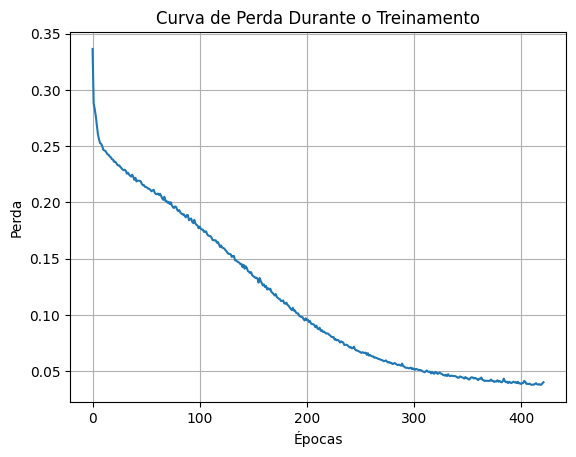

In [6]:
print("\n🔍 Matriz de Confusão:")
print(confusion_matrix(y_test, optimized_mlp_pred))

print("\n📊 Relatório de Classificação:")
print(classification_report(y_test, optimized_mlp_pred))

print(f"\n✅ Acurácia: {accuracy_score(y_test, optimized_mlp_pred):.4f}")

#Curva de perda
plt.plot(optimized_mlp.loss_curve_)
plt.title("Curva de Perda Durante o Treinamento")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.grid(True)
plt.show()

KNN

K=1 → Acurácia: 0.8423
K=3 → Acurácia: 0.8642
K=5 → Acurácia: 0.8678
K=7 → Acurácia: 0.8783
K=9 → Acurácia: 0.8792
K=11 → Acurácia: 0.8771


,K,Acurácia
0,9,0.879157
1,7,0.878345
2,11,0.877129
3,5,0.867802
4,3,0.864152
5,1,0.842255


C:\Users\Tiago\AppData\Local\Temp\ipykernel_13484\1275377054.py:36: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


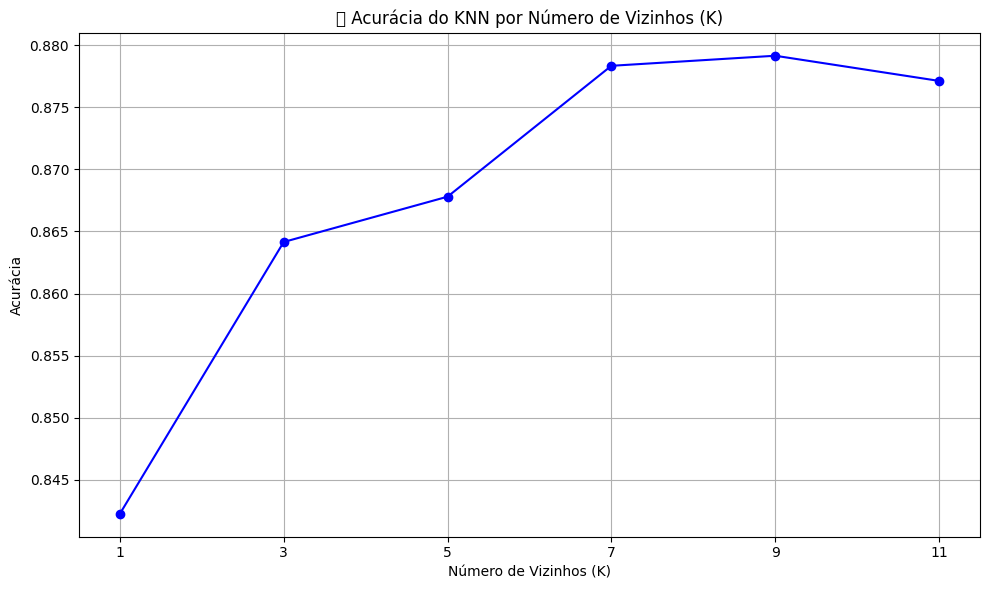


🔍 Matriz de Confusão (K=9):
[[2032   52]
 [ 246  136]]

📋 Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.89      0.98      0.93      2084
        True       0.72      0.36      0.48       382

    accuracy                           0.88      2466
   macro avg       0.81      0.67      0.70      2466
weighted avg       0.87      0.88      0.86      2466


✅ Acurácia Final: 0.8792


In [ ]:
# Separação dos dados para o KNN
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# Normalização exclusiva para o KNN
scaler_knn = StandardScaler()
X_train_knn = scaler_knn.fit_transform(X_train_knn)
X_test_knn = scaler_knn.transform(X_test_knn)

# Teste com diferentes valores de k
k_values = [1, 3, 5, 7, 9, 11]
accuracies_knn = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    y_pred = knn.predict(X_test_knn)
    acc = accuracy_score(y_test_knn, y_pred)
    accuracies_knn.append(acc)
    print(f"K={k} → Acurácia: {acc:.4f}")

# Tabela da acurácia por valor de K
df_knn = pd.DataFrame({'K': k_values, 'Acurácia': accuracies_knn})
display(df_knn.sort_values(by='Acurácia', ascending=False).reset_index(drop=True))


# Gráfico mais bonito e informativo
plt.figure(figsize=(10, 6))
plt.plot(df_knn['K'], df_knn['Acurácia'], marker='o', linestyle='-', color='blue')
plt.xticks(k_values)
plt.title("Acurácia do KNN por Número de Vizinhos (K)")
plt.xlabel("Número de Vizinhos (K)")
plt.ylabel("Acurácia")
plt.grid(True)
plt.tight_layout()
plt.show()


# Avaliação final com o melhor k
melhor_k = k_values[accuracies_knn.index(max(accuracies_knn))]
knn_final = KNeighborsClassifier(n_neighbors=melhor_k)
knn_final.fit(X_train_knn, y_train_knn)
y_pred_final = knn_final.predict(X_test_knn)

print(f"\nMatriz de Confusão (K={melhor_k}):")
print(confusion_matrix(y_test_knn, y_pred_final))

print("\nRelatório de Classificação:")
print(classification_report(y_test_knn, y_pred_final))

print(f"\nAcurácia Final: {accuracy_score(y_test_knn, y_pred_final):.4f}")

COMPARAÇÂO MELHOR KNN E MELHOR MLP

,Modelo,Acurácia,Precisão,Recall,F1-Score
0,KNN,0.879157,0.723404,0.356021,0.477193
1,MLP,0.869424,0.583799,0.547120,0.564865


C:\Users\Tiago\AppData\Local\Temp\ipykernel_13484\2686164800.py:36: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Tiago\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


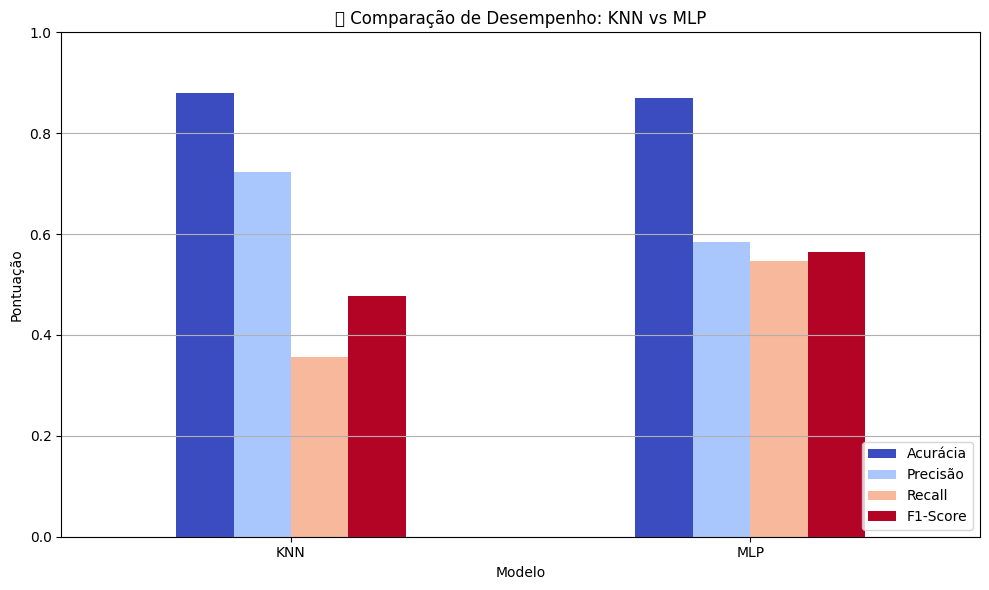


🔷 Melhor valor de K no KNN: 9

🔶 Melhores parâmetros do MLP otimizados pelo GridSearch:
{'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 150), 'learning_rate_init': 0.001, 'max_iter': 600, 'solver': 'adam', 'verbose': True}


In [ ]:
# Métricas do KNN
knn_precision = precision_score(y_test_knn, y_pred_final, zero_division=0)
knn_recall = recall_score(y_test_knn, y_pred_final, zero_division=0)
knn_f1 = f1_score(y_test_knn, y_pred_final, zero_division=0)
knn_accuracy = accuracy_score(y_test_knn, y_pred_final)

# Métricas do MLP
mlp_precision = precision_score(y_test, optimized_mlp_pred, zero_division=0)
mlp_recall = recall_score(y_test, optimized_mlp_pred, zero_division=0)
mlp_f1 = f1_score(y_test, optimized_mlp_pred, zero_division=0)
mlp_accuracy = accuracy_score(y_test, optimized_mlp_pred)

# Tabela comparativa
df_comp = pd.DataFrame({
    'Modelo': ['KNN', 'MLP'],
    'Acurácia': [knn_accuracy, mlp_accuracy],
    'Precisão': [knn_precision, mlp_precision],
    'Recall': [knn_recall, mlp_recall],
    'F1-Score': [knn_f1, mlp_f1]
})

# Exibindo a tabela
display(df_comp)

# Gráfico comparativo
df_comp_plot = df_comp.set_index('Modelo')
df_comp_plot.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title("🔍 Comparação de Desempenho: KNN vs MLP")
plt.ylabel("Pontuação")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Parâmetros usados
print("\nMelhor valor de K no KNN:", melhor_k)
print("\nMelhores parâmetros do MLP otimizados pelo GridSearch:")
print(gs_mlp.best_params_)
